(100, 0, 8)
8 10 0.0
10 12 0.0
12 16 0.0
16 24 0.0
24 32 0.0
32 40 0.0
40 44 0.0
[0.0] [0.0]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32
5 0.02795084971874737 32 40
6 0.02383656473113981 40 44


<ErrorbarContainer object of 3 artists>

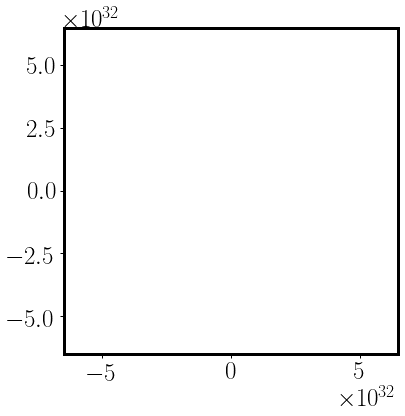

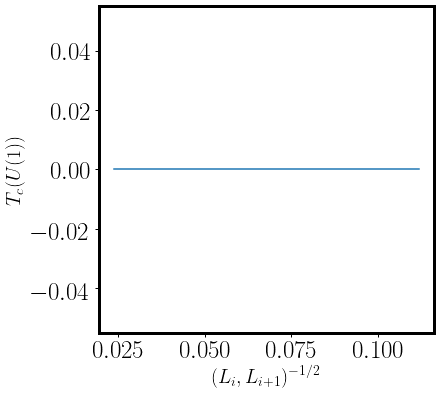

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit


plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

bare_Tc=[]
bare_Tc_err=[]
nu_list=[]
e=0
nu=0.4
h=1
rho=1
eta1=0
eta2=0.1
blow=0.375
bhigh=0.379
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32, 40, 44])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))




fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
# ax1.set_xlim((bmin, bmax))
from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_alpha1_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init1" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
condition1=np.where((beta<bmax))[0]
condition2=np.where((beta>bmin))[0]
condition=np.intersect1d(condition1, condition2)
#print(condition)


U_cross=np.zeros((N_dataset, len(condition), len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_alpha1_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init1" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U= data_U[1]
        err_U= data_U[2]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        U=U[condition]
        err_U=err_U[condition]
        beta=beta[condition]
        U_cross[n, :, l]=U_all[n][condition]
        ax1.plot(beta, U[n,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition_1=np.where(U_cross[n,:, l2] <0.9)[0]
            condition_2=np.where(U_cross[n,:, l2]>(U_cross[n,:, l1]))[0]
            condition=np.intersect1d(condition_1, condition_2)
            #print(condition[-1])
            if(condition.size>0):
                # print(condition)
                index1=condition[-1]
                index2=index1+1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
                # print(l1, l2, betac_cross[n,l2-1])
            # else:
            #    print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    #ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

In [29]:
e=0
nu=0.2
h=1
rho=1
eta1=0
eta2=1
blow=0.345
bhigh=0.352
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.3475
bmax=0.351

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
condition1=np.where((beta<bmax))[0]
condition2=np.where((beta>bmin))[0]
condition=np.intersect1d(condition1, condition2)
#print(condition)


U_cross=np.zeros((N_dataset, len(condition), len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U= data_U[1]
        err_U= data_U[2]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        U=U[condition]
        err_U=err_U[condition]
        beta=beta[condition]
        U_cross[n, :, l]=U_all[n][condition]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

OSError: /home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_0/nu_0.2/h_1/L8_rho1_eta10_eta21_e0_h1_nu0.2_bmin0.345_bmax0.352_nMAX30_init0/Binder_cumulant.txt not found.

(100, 50, 6)
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
8 10 0.3772731211888165
10 12 0.3774476062331234
12 16 0.3777188216993465
16 24 0.37923842188610946
24 32 0.37962791503395776
[0.3381765109316316, 0.3484073573839165, 0.37826117720827074] [0.0009262904559877913, 0.0004459370346995463, 0.00021397943372071081]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

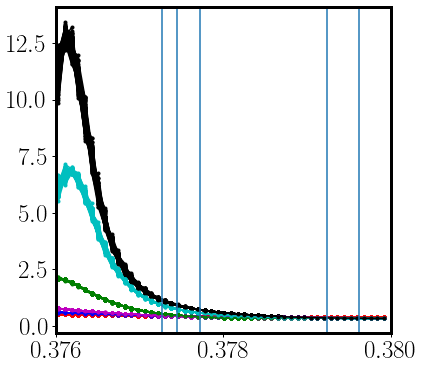

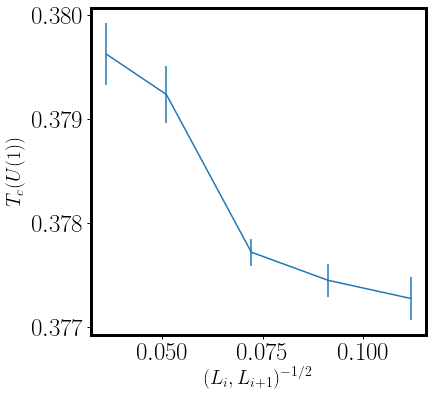

In [60]:
e=0
nu=0.4
h=1
rho=1
eta1=0
eta2=1
blow=0.375
bhigh=0.38
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.376
bmax=0.38

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
condition1=np.where((beta<bmax))[0]
condition2=np.where((beta>bmin))[0]
condition=np.intersect1d(condition1, condition2)
#print(condition)


U_cross=np.zeros((N_dataset, len(condition), len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U= data_U[1]
        err_U= data_U[2]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        U=U[condition]
        err_U=err_U[condition]
        beta=beta[condition]
        U_cross[n, :, l]=U_all[n][condition]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

(100, 16, 6)
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
nada
na

<ErrorbarContainer object of 3 artists>

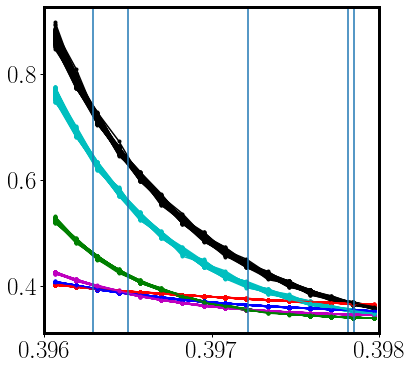

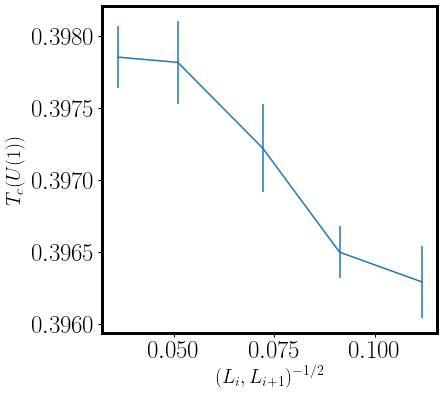

In [61]:
e=0
nu=0.5
h=1
rho=1
eta1=0
eta2=1
blow=0.392
bhigh=0.4
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.396
bmax=0.398

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
condition1=np.where((beta<bmax))[0]
condition2=np.where((beta>bmin))[0]
condition=np.intersect1d(condition1, condition2)
#print(condition)


U_cross=np.zeros((N_dataset, len(condition), len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U= data_U[1]
        err_U= data_U[2]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        U=U[condition]
        err_U=err_U[condition]
        beta=beta[condition]
        U_cross[n, :, l]=U_all[n][condition]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

(100, 25, 6)
8 10 0.40047893402251716
10 12 0.4005468704432089
12 16 0.400522685964955
16 24 0.400376060406203
24 32 0.40100293911999485
[0.3381765109316316, 0.3484073573839165, 0.37826117720827074, 0.3971349847442479, 0.4005854979913758] [0.0009262904559877913, 0.0004459370346995463, 0.00021397943372071081, 0.00024713473739207555, 0.0004080458491633017]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

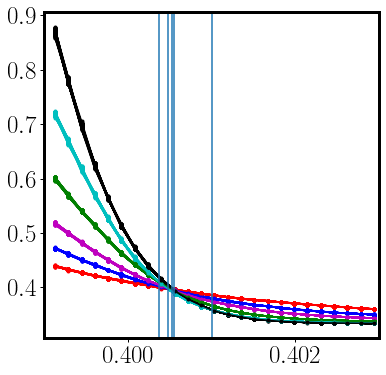

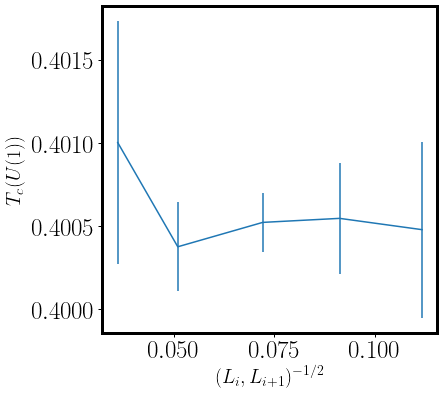

In [62]:
e=0
nu=0.525
h=1
rho=1
eta1=0
eta2=1
blow=0.395
bhigh=0.405
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.399
bmax=0.403

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
condition1=np.where((beta<bmax))[0]
condition2=np.where((beta>bmin))[0]
condition=np.intersect1d(condition1, condition2)
#print(condition)


U_cross=np.zeros((N_dataset, len(condition), len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U= data_U[1]
        err_U= data_U[2]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        U=U[condition]
        err_U=err_U[condition]
        beta=beta[condition]
        U_cross[n, :, l]=U_all[n][condition]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

(100, 38, 6)
8 10 0.39875211867329446
10 12 0.3981580882206764
12 16 0.40071623264810136
16 24 0.40030992122312853
24 32 0.4001997850642936
[0.3381765109316316, 0.3484073573839165, 0.37826117720827074, 0.3971349847442479, 0.4005854979913758, 0.3996272291658988] [0.0009262904559877913, 0.0004459370346995463, 0.00021397943372071081, 0.00024713473739207555, 0.0004080458491633017, 0.00045826436719025607]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

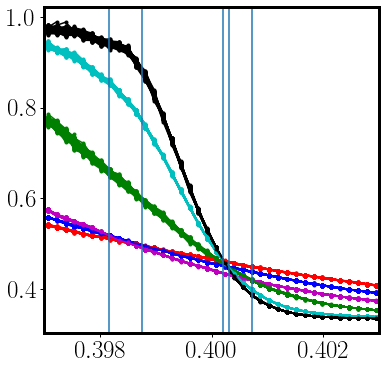

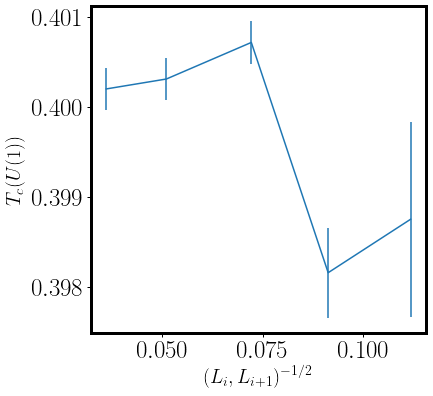

In [63]:
e=0
nu=0.55
h=1
rho=1
eta1=0
eta2=1
blow=0.395
bhigh=0.405
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.397
bmax=0.403

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
condition1=np.where((beta<bmax))[0]
condition2=np.where((beta>bmin))[0]
condition=np.intersect1d(condition1, condition2)
#print(condition)


U_cross=np.zeros((N_dataset, len(condition), len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U= data_U[1]
        err_U= data_U[2]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        U=U[condition]
        err_U=err_U[condition]
        beta=beta[condition]
        U_cross[n, :, l]=U_all[n][condition]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

(100, 38, 6)
8 10 0.3925376716524964
10 12 0.392249065442952
12 16 0.392461148274374
16 24 0.3923160478339199
24 32 0.39242961910930246
[0.3381765109316316, 0.3484073573839165, 0.37826117720827074, 0.3971349847442479, 0.4005854979913758, 0.3996272291658988, 0.39239871046260894] [0.0009262904559877913, 0.0004459370346995463, 0.00021397943372071081, 0.00024713473739207555, 0.0004080458491633017, 0.00045826436719025607, 0.0006401469609082457]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

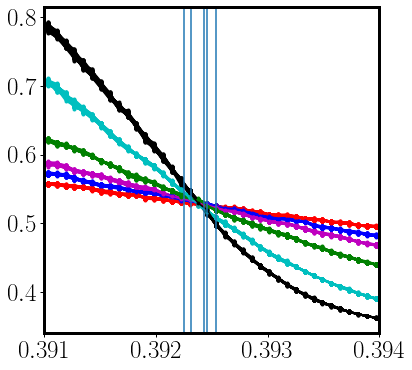

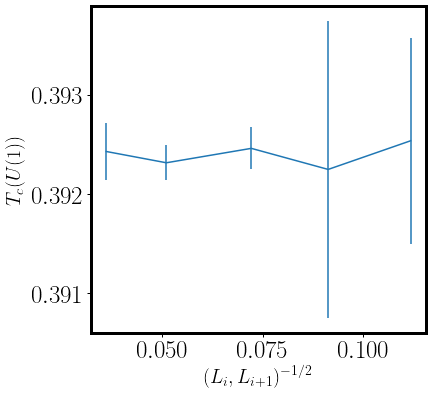

In [64]:
e=0
nu=0.6
h=1
rho=1
eta1=0
eta2=1
blow=0.39
bhigh=0.395
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.391
bmax=0.394

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
condition1=np.where((beta<bmax))[0]
condition2=np.where((beta>bmin))[0]
condition=np.intersect1d(condition1, condition2)
#print(condition)


U_cross=np.zeros((N_dataset, len(condition), len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U= data_U[1]
        err_U= data_U[2]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        U=U[condition]
        err_U=err_U[condition]
        beta=beta[condition]
        U_cross[n, :, l]=U_all[n][condition]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

(100, 37, 6)
8 10 0.3835729117162019
10 12 0.3833707545487778
12 16 0.3835567302334525
16 24 0.3835530264895171
24 32 0.3835607829008936
[0.3381765109316316, 0.3484073573839165, 0.37826117720827074, 0.3971349847442479, 0.4005854979913758, 0.3996272291658988, 0.39239871046260894, 0.3835228411777686] [0.0009262904559877913, 0.0004459370346995463, 0.00021397943372071081, 0.00024713473739207555, 0.0004080458491633017, 0.00045826436719025607, 0.0006401469609082457, 0.0008095358928575123]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

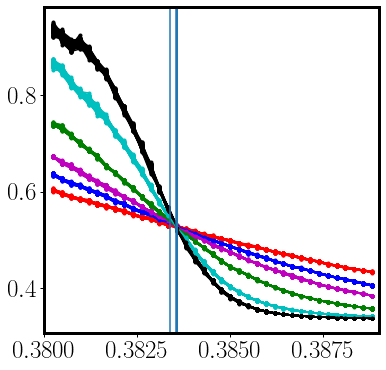

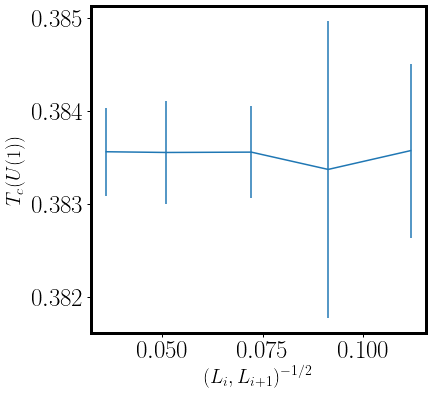

In [65]:
e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=1
blow=0.375
bhigh=0.39
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.38
bmax=0.389

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
condition1=np.where((beta<bmax))[0]
condition2=np.where((beta>bmin))[0]
condition=np.intersect1d(condition1, condition2)
#print(condition)


U_cross=np.zeros((N_dataset, len(condition), len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U= data_U[1]
        err_U= data_U[2]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        U=U[condition]
        err_U=err_U[condition]
        beta=beta[condition]
        U_cross[n, :, l]=U_all[n][condition]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

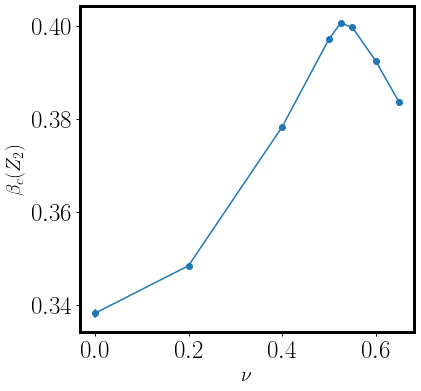

In [66]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xlabel(r"$\nu$")
ax2.set_ylabel(r"$\beta_c(Z_2)$")
ax2.errorbar(nu_list,bare_Tc, yerr= bare_Tc_err, fmt="o-")

np.savetxt("%s/betac_Binder_Z2.txt" %(folder_fig), (nu_list,bare_Tc, bare_Tc_err))